In [35]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10], dy = 5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, 
               nonscatter=True, s0=10):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label,
                        s=s0)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if dx:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)


/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductanc

1.0

0.0746802999053033


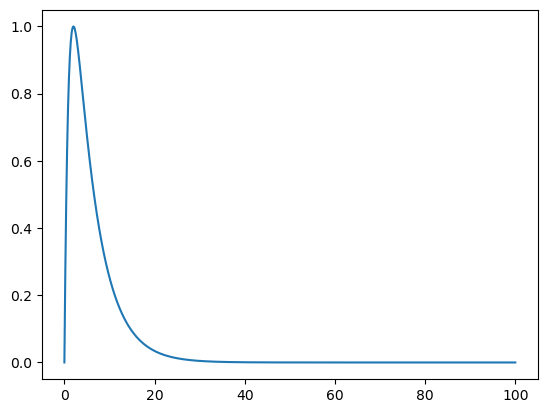

In [2]:
run_dt=0.1
syn_tau1 = 1.
syn_tau2 = 5.
t=np.arange(0,100+run_dt,run_dt)
NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
plt.plot(t,uE)
ground_truth = np.mean(uE)
print(ground_truth)

In [39]:
def recovery_of_local_conductance(run_dt,dV, fE, passive = False, 
                    E = True, loc=58, block='',name= '', plot=False,
                    location ='dend',  setIh=False, gIhbar_Ih = 0.0002):
    
    L5PC = h.L5PCtemplate(morphologyFilename)

    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.   
    
    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0.)
        
    if setIh:
        for sec in h.allsec():
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = gIhbar_Ih
             
    # Set simulation parameters
    h.dt = run_dt
    h.tstop = 200.
    h.v_init = -77.
    v_clamp = -77.
    
    recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)


    # Initialize an excitatory or inhibitory synaptic input
    # make a new stimulator
    stim = h.NetStim()
    
    # attach it to a synapse
    if location == 'dend':
        syn = h.Exp2Syn(L5PC.dend[int(loc)](0.9))
    if location == 'apic':
        syn = h.Exp2Syn(L5PC.apic[int(loc)](0.9))
    syn.tau1 = 1.  # ms
    syn.tau2 = 5.  # ms
    if E:
        if passive:
            syn.e = 0.  # mV for E input and -100 for I input
        else:
            syn.e  = 13.6
    else: 
        if passive:
            syn.e = -100.
        else:
            syn.e = -86.4
    print(syn.e)
        
    stim.number = 1
    stim.start = 100.  # ms
    ncstim = h.NetCon(stim, syn)
    ncstim.delay = 0.
    ncstim.weight[0] = 0.  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = v_clamp
    vclamp.dur1 = h.tstop
    vclamp.amp2 = v_clamp - 20.

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():
    
        Vclamp = np.arange(-100.,-60., dV) 
        Isyn_inj = np.zeros(len(Vclamp))
        vclamp.dur1 = 0.
        vclamp.dur2 = 0.
        vclamp.dur3 = 0.
        ncstim.weight[0] = 0.
        go()
        recv0 = np.array(recv.to_python())
        V_rest = recv0[2000]
        print(V_rest)
        Isyn_inj_t = np.zeros((len(Vclamp),1000))

        for i in range(len(Vclamp)):
            ncstim.weight[0] = 0.
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            go()
            
            Isyn0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            ncstim.weight[0] = fE
            vclamp.amp1 = Vclamp[i]
            vclamp.dur1 = h.tstop
            go()
            Isyn1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
            Isyn= - (Isyn1[1001:] - Isyn0[1001:])
            # Isyn_inj[i] = np.sum(Isyn*run_dt)
            Isyn_inj[i] = np.mean(Isyn)
            Isyn_inj_t[i,:] = Isyn
        
            
        A = np.ones((len(Vclamp),2))
        A[:,0] = Vclamp - V_rest
        A1 = Vclamp - V_rest
        x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj, rcond=None)
        
        
        # if E:
        #     mean_local_conductance = - x[1]**2/(x[0]*(0. - V_rest)**2)
        #     A1 = A1 - (syn.e - V_rest)
        # else:
        #     mean_local_conductance = - x[1]**2/(x[0]*(-100.- V_rest)**2)
        #     A1 = A1 - (syn.e - V_rest)
        print(syn.e)
        mean_local_conductance = - x[1]**2/(x[0]*(syn.e - V_rest)**2)
        A1 = A1 - (syn.e - V_rest)
            
        traditional_effective_conductance = np.zeros(1000)
        for i in range(1000):
            a = np.sum(A1 * Isyn_inj_t[:,i]) / np.sum(A1**2)  # 计算斜率
            traditional_effective_conductance[i] = - a
            
        traditional_mean_conductance = np.mean(traditional_effective_conductance)
        
        return mean_local_conductance, traditional_mean_conductance, A, Isyn_inj
    
    
    mean_local_conductance, traditional_mean_conductance, A, Isyn_inj = main()
    
    return mean_local_conductance, traditional_mean_conductance

    

In [34]:
est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,5e-4, 
        passive = False, E = True, loc = 34, block='', name= '', location = 'apic', setIh=True, gIhbar_Ih = 0.0002/20.)
fE = 5e-4
error = (est_mean_cond - ground_truth*fE)/(ground_truth*fE)
print(error)

0.0
-88.99077769937534
0.0
0.09792632810055582


# fE/fI

In [49]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    fE0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10., fE0, 
        passive = True, E = False, loc = 82, block = '', name = '', location = 'dend')
     
    return est_mean_cond, est_trad_mean_cond

# fE = np.linspace(1e-4, 5e-3, 50)
# fE = np.linspace(1e-4, 2e-2, 50) # I input
fE = np.linspace(1e-5, 1e-3, 50) # tip I input

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(fE0,) for fE0 in fE]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(fE), 2))
for i, result in enumerate(results):
    estimated_mean_cond[i, :] = result
    

np.savetxt("estimated_mean_cond_passive_dend82_fI.txt", estimated_mean_cond)

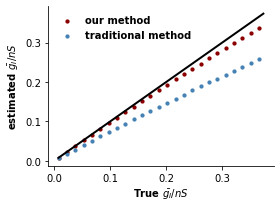

In [6]:
estimated_mean_cond = np.loadtxt('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_apicloc34_fE.txt')
fE = np.linspace(1e-4, 5e-3, 50)*ground_truth*1e3 # for E
# fE = np.linspace(1e-4, 2e-2, 50)*ground_truth*1e3 # for I
# fE = np.linspace(1e-5, 1e-3, 50)*ground_truth*1e3 # tip I input
fig, ax2 = plt.subplots(1,1, figsize = (4,3.))
plot_curve(ax2, fE[::2], estimated_mean_cond[::2,0]*1e3, color='darkred',
           title='' , xlim=[0,4],dx=0, ylim=[0,6],dy=0, 
           alpha = 1.0, xlabel='True '+r'$\bar{g_E}/nS$', ylabel = 'measured '+r'$\bar{g_E}$',
           label='our method', nonscatter=False, s0=5)
plot_curve(ax2, fE, fE, color='black', dx=0, dy=0)
plot_curve(ax2, fE[::2], estimated_mean_cond[::2,1]*1e3, color='steelblue',
           title='' , xlim=[0,1.6],dx=0., ylim=[0,1.6],dy=0., 
           alpha = 1.0, xlabel='True '+r'$\bar{g_I}/nS$', 
           ylabel = 'estimated '+r'$\bar{g_I}/nS$',
           label='traditional method', nonscatter=False, s0=5)
plt.tight_layout()
# plt.savefig('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure1/mean_local_cond_I'+'.eps', format='eps', bbox_inches='tight')

In [56]:
error = np.abs(estimated_mean_cond[::2,0]*1e3 - fE[::2])/(fE[::2])
print(min(error))

0.010207940382979463


# distance and location

In [7]:
L5PC = h.L5PCtemplate(morphologyFilename)
x_soma = (L5PC.soma[0].x3d(0)+ L5PC.soma[0].x3d(1))/2.
y_soma = (L5PC.soma[0].y3d(0)+ L5PC.soma[0].y3d(1))/2.
z_soma = (L5PC.soma[0].z3d(0)+ L5PC.soma[0].z3d(1))/2.
locationE = 'apic'
locnumE = 34
if locationE=='dend':
    x_synE = (L5PC.dend[int(locnumE)].x3d(0)+ L5PC.dend[int(locnumE)].x3d(1))/2.
    y_synE = (L5PC.dend[int(locnumE)].y3d(0)+ L5PC.dend[int(locnumE)].y3d(1))/2.
    z_synE = (L5PC.dend[int(locnumE)].z3d(0)+ L5PC.dend[int(locnumE)].z3d(1))/2.
if locationE=='apic':
    x_synE = (L5PC.apic[int(locnumE)].x3d(0)+ L5PC.apic[int(locnumE)].x3d(1))/2.
    y_synE = (L5PC.apic[int(locnumE)].y3d(0)+ L5PC.apic[int(locnumE)].y3d(1))/2.
    z_synE = (L5PC.apic[int(locnumE)].z3d(0)+ L5PC.apic[int(locnumE)].z3d(1))/2.
distance = np.sqrt((x_soma-x_synE)**2 + (y_soma-y_synE)**2 + (z_soma-z_synE)**2)
print(distance)

298.43237908876847


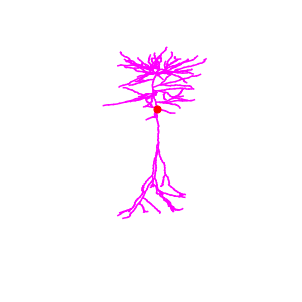

In [8]:
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)
sec=L5PC.apic[34]
ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='red', s=50, marker='o', label='apic[34]')


# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
# plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/figure/mean_local_cond_syn_location.eps", format='eps', dpi=300)
plt.show()


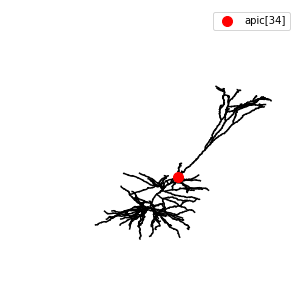

In [14]:
from neuron import h
from matplotlib import pyplot, cm
L5PC = h.L5PCtemplate(morphologyFilename)
ps = h.PlotShape(True)
ax = ps.plot(pyplot)
# 将神经元图的线条颜色更改为黑色
for line in ax.lines:
    line.set_color('black')

# 在原点标记一个点
# ax.scatter([x_soma], [y_soma],[z_soma], color='red', s=20, marker='o', label='soma')
# ax.scatter([x_syn], [y_syn],[z_syn], color='blue', s=20, marker='o', label='58')
# ax.scatter([x_syn1], [y_syn1],[z_syn1], color='yellow', s=20, marker='o', label='0')
# ax.scatter([x_syn2], [y_syn2],[z_syn2], color='green', s=20, marker='o', label='2')
sec=L5PC.apic[34]
ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='red', s=100, marker='o', label='apic[34]')
ax.legend(loc='best')
          
# 设置坐标轴范围
ax.set_xlim([-700, 0])  # 替换 xmin 和 xmax 为所需的 x 范围
ax.set_ylim([500, 1400])  # 替换 ymin 和 ymax 为所需的 y 范围
ax.set_zlim([-1000, 00])  # 替换 zmin 和 zmax 为所需的 z 范围
# 关闭网格
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
pyplot.show()


# EPSP

In [18]:
def caculatePSP(fE, passive=False, E = True, location='dend', loc=58, block='',name= '', plot = False):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    recv = h.Vector()
    recv.record(L5PC.soma[0](0.5)._ref_v)
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.

    if block:
        for sec in h.allsec():
            if h.ismembrane(block, sec=sec):
                # 将电导设置为0
                setattr(sec, name, 0)
    
    
    # Set simulation parameters
    h.dt = 0.1
    h.tstop = 500
    if passive:
       h.v_init = -90.
    else:
       h.v_init = -77.


    # Initialize an excitatory or inhibitory synaptic input
    # make a new stimulator
    stim = h.NetStim()

    if location == 'dend':
        syn = h.Exp2Syn(L5PC.dend[int(loc)](0.9))
    if location == 'apic':
        syn = h.Exp2Syn(L5PC.apic[int(loc)](0.9))
        
    syn.tau1 = 1.  # ms
    syn.tau2 = 5.  # ms
    if E:
        syn.e = 0.  # mV for E input and -80 for I input
    else: 
        syn.e = -100.
    # print(syn.e)
        
    stim.number = 1
    stim.start = 400.  # ms
    ncstim = h.NetCon(stim, syn)
    ncstim.delay = 0.
    ncstim.weight[0] = fE  # uS

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():
        
        go()
        v_array = recv.to_python()
        # v_syn_array = v_syn.to_python()
        V_cut = v_array[3500:]
        # if plot:
        #     plt.plot(V_cut)
        #     plt.plot(v_syn_array[3500:])
        PSP = np.max(V_cut) - np.min(V_cut)

        return PSP
    
    PSP = main()
    return PSP        

In [19]:
def caculatePSP_parallel(args):
    loc0, = args
    PSP = caculatePSP(5e-4, passive = True, E = False, location='apic', plot = False,
        loc=loc0, block='', name='')
    return PSP

# fE = np.linspace(1e-4, 5e-3, 50)  for E
# fE = np.linspace(1e-4, 2e-2, 50)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(caculatePSP_parallel, args_list)

# Process the results
PSP = np.zeros(len(loc))
for i, result in enumerate(results):
    PSP[i] = result
    
# np.savetxt("EPSP_active_fE.txt",PSP)
    
np.savetxt("IPSP_passive_apicloc109_fI5e4.txt",PSP)

In [20]:
def caculatePSP_parallel(args):
    loc0, = args
    PSP = caculatePSP(5e-4, passive = True, E = False, location='dend', plot = False,
        loc=loc0, block='', name='')
    return PSP

# fE = np.linspace(1e-4, 5e-3, 50)  for E
# fE = np.linspace(1e-4, 2e-2, 50)
loc=np.arange(0, 84, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(caculatePSP_parallel, args_list)

# Process the results
PSP = np.zeros(len(loc))
for i, result in enumerate(results):
    PSP[i] = result
    
# np.savetxt("EPSP_active_fE.txt",PSP)
    
np.savetxt("IPSP_passive_dendloc84_fI5e4.txt",PSP)

In [21]:
def caculatePSP_parallel(args):
    loc0, = args
    PSP = caculatePSP(5e-4, passive = True, E = True, location='dend', plot = False,
        loc=loc0, block='', name='')
    return PSP

# fE = np.linspace(1e-4, 5e-3, 50)  for E
# fE = np.linspace(1e-4, 2e-2, 50)
loc=np.arange(0, 84, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(caculatePSP_parallel, args_list)

# Process the results
PSP = np.zeros(len(loc))
for i, result in enumerate(results):
    PSP[i] = result
    
# np.savetxt("EPSP_active_fE.txt",PSP)
    
np.savetxt("EPSP_passive_dendloc84_fE5e4.txt",PSP)

In [22]:
def caculatePSP_parallel(args):
    loc0, = args
    PSP = caculatePSP(5e-4, passive = True, E = True, location='apic', plot = False,
        loc=loc0, block='', name='')
    return PSP

# fE = np.linspace(1e-4, 5e-3, 50)  for E
# fE = np.linspace(1e-4, 2e-2, 50)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(caculatePSP_parallel, args_list)

# Process the results
PSP = np.zeros(len(loc))
for i, result in enumerate(results):
    PSP[i] = result
    
# np.savetxt("EPSP_active_fE.txt",PSP)
    
np.savetxt("EPSP_passive_apicloc109_fE5e4.txt",PSP)

In [16]:
PSP = caculatePSP(1e-4, passive = True, E = True, location='dend',
        loc = 82, block='', name='')
# EPSP = np.loadtxt("EPSP_passive_apicloc34_fI.txt")
# plt.plot(EPSP)
# print(np.min(EPSP), np.max(EPSP))

# gIhbar_Ih

In [ ]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    gIhbar_Ih0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10., 1e-4, 
        passive=False, E = True, loc=34, block='',name= '', location ='apic', setIh=True, gIhbar_Ih = gIhbar_Ih0)
     
    return est_mean_cond, est_trad_mean_cond

gIhbar_Ih = np.linspace(0, 1, 50)*0.0002

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(gIhbar_Ih0,) for gIhbar_Ih0 in gIhbar_Ih]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(gIhbar_Ih), 2))
for i, result in enumerate(results):
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_apicloc34_fE1e4_gIhbar_Ih.txt", estimated_mean_cond)

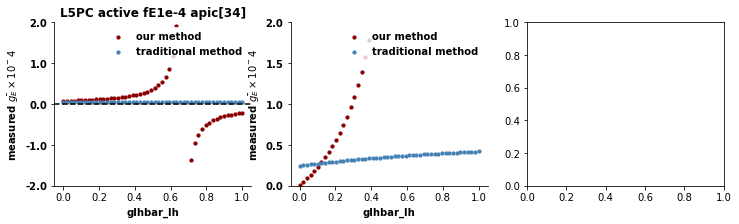

In [190]:
def model(x, a, b, c):
    return a + b / (x + c)
estimated_mean_cond = np.loadtxt('estimated_mean_cond_active_apicloc34_fE1e4_gIhbar_Ih.txt')
fE =1e-4
error_us = np.abs(estimated_mean_cond[:,0] - ground_truth*fE)/(ground_truth*fE)
error_trad = np.abs(estimated_mean_cond[:,1] - ground_truth*fE)/(ground_truth*fE)

gIhbar_Ih = np.linspace(0, 1, 50)
fig, ax2 = plt.subplots(1,3, figsize = (12,3.))
plot_curve(ax2[0], gIhbar_Ih, estimated_mean_cond[:,0]*1e4, color='darkred',
           title='L5PC active fE1e-4 apic[34]' , xlim=[0,210],dx=0, ylim=[0,6],dy=0, 
           alpha = 1.0, xlabel='gIhbar_Ih', ylabel = 'measured '+r'$\bar{g_E}\times 10^-4$',
           label='our method', nonscatter=False, s0=5)
plot_curve(ax2[0], gIhbar_Ih, estimated_mean_cond[:,1]*1e4, color='steelblue',
           title='L5PC active fE1e-4 apic[34]' , xlim=[0,210],dx=0, ylim=[-2,2],dy=1, 
           alpha = 1.0, xlabel='gIhbar_Ih', ylabel = 'measured '+r'$\bar{g_E}\times 10^-4$',
           label='traditional method', nonscatter=False, s0=5)
ax2[0].axhline(y=1e-4*ground_truth, color='black', linestyle='--', label='ground truth')

plot_curve(ax2[1], gIhbar_Ih, error_us, color='darkred',
           title='' , xlim=[0,210],dx=0, ylim=[0,6],dy=0, 
           alpha = 1.0, xlabel='gIhbar_Ih', ylabel = 'measured '+r'$\bar{g_E}\times 10^-4$',
           label='our method', nonscatter=False, s0=5)
plot_curve(ax2[1], gIhbar_Ih, error_trad, color='steelblue',
           title='' , xlim=[0,210],dx=0, ylim=[0,2],dy=0.5, 
           alpha = 1.0, xlabel='gIhbar_Ih', ylabel = 'measured '+r'$\bar{g_E}\times 10^-4$',
           label='traditional method', nonscatter=False, s0=5)



# location

In [4]:
est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = False, loc=83, block='Ih', 
        name= 'gIhbar_Ih', location ='dend',  setIh = True, gIhbar_Ih = 0.0002/20.)

In [40]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = True, loc=loc0[1], block='', 
        name= '', location =loc0[0],  setIh = True, gIhbar_Ih = 0.0/20.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

Num = 109 + 84
loc = np.zeros((Num, 2), dtype=object)
loc[:109,0] = 'apic'
loc[109:,0] = 'dend'
loc[:109,1] = np.arange(0,109,1).astype(int)
loc[109:,1] = np.arange(0,84,1).astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
# np.savetxt("estimated_mean_cond_active_alldend_gIhbar_Ih0_05_fE5e4_relative_reversal_potential.txt", estimated_mean_cond)

np.savetxt("estimated_mean_cond_active_alldend_blockIh_fE5e4_relative_reversal_potential.txt", estimated_mean_cond)

13.6
13.613.6

13.6
13.613.613.6
13.6

13.613.6


13.613.6
13.613.6

13.613.613.613.6



13.613.613.613.613.6




13.6
13.613.6
13.613.6


13.6

13.6
13.6
13.613.6

13.6
13.6
13.6
13.6
13.6
13.613.6

13.6
13.6
13.6
13.6
13.6
13.613.6

13.6
13.613.6

-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106-89.84845078615106-89.84845078615106


-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106-89.84845078615106
-89.84845078615106-89.84845078615106

-89.84845078615106
-89.84845078615106-89.84845078615106


-89.84845078615106-89.84845078615106

-89.84845078615106-89.84845078615106-89.84845078615106

-89.84845078615106-89.84845078615106


-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106
-89.84845078615106-89.84845078615106

-89.84845078615106-89.84845078615106-89.84845078615106-89.84845078

In [15]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = False, loc=loc0, block='Ih', 
        name= 'gIhbar_Ih', location ='dend',  setIh = True, gIhbar_Ih = 0.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

loc=np.arange(0, 84, 1)
# loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_dendloc84_fI5e4_blockIh.txt", estimated_mean_cond)

-86.4-86.4

-86.4-86.4-86.4

-86.4
-86.4
-86.4
-86.4-86.4

-86.4
-86.4-86.4-86.4-86.4
-86.4
-86.4

-86.4
-86.4

-86.4


-86.4-86.4-86.4


-86.4
-86.4-86.4-86.4


-86.4-86.4-86.4

-86.4-86.4
-86.4


-86.4-86.4

-86.4-86.4-86.4-86.4-86.4




-86.4
-86.4
-86.4-86.4-86.4-86.4



-86.4-86.4
-86.4

-86.4
-86.4
-86.4
-86.4-86.4

-86.4
-86.4
-86.4
-86.4-86.4

-86.4
-86.4
-86.4
-86.4-86.4-86.4
-86.4
-86.4


-86.4-86.4-86.4-86.4
-86.4


-86.4-86.4-86.4



-86.4-86.4-86.4-86.4
-86.4
-86.4



-86.4-86.4

-86.4


In [6]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = False, loc=loc0, block='', 
        name= '', location ='apic',  setIh = True, gIhbar_Ih = 0.0002/20.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

# loc=np.arange(0, 84, 1)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_apicloc109_fI5e4.txt", estimated_mean_cond)

In [11]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = False, loc=loc0, block='Ih', 
        name= 'gIhbar_Ih', location ='apic',  setIh = True, gIhbar_Ih = 0.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

# loc=np.arange(0, 84, 1)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_apicloc109_fI5e4_blockIh.txt", estimated_mean_cond)

In [10]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        1e-4, passive = False, E = True, loc=loc0, block='', 
        name= '', location ='dend',  setIh = True, gIhbar_Ih = 0.0002/20.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

loc=np.arange(0, 84, 1)
# loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_dendloc84_fE1e4.txt", estimated_mean_cond)

In [9]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = True, loc=loc0, block='Ih', 
        name= 'gIhbar_Ih', location ='dend',  setIh = True, gIhbar_Ih = 0.0)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

loc=np.arange(0, 84, 1)
# loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_dendloc84_fE5e4_blockIh.txt", estimated_mean_cond)

In [11]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        1e-4, passive = False, E = True, loc=loc0, block='', 
        name= '', location ='apic',  setIh = True, gIhbar_Ih = 0.0002/20.)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

# loc=np.arange(0, 84, 1)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_apicloc109_fE1e4.txt", estimated_mean_cond)

In [10]:
# Your existing functions and code
def recovery_of_local_conductance_parallel(args,):
    loc0, = args
    est_mean_cond, est_trad_mean_cond = recovery_of_local_conductance(0.1, 10.,
        5e-4, passive = False, E = True, loc=loc0, block='Ih', 
        name= 'gIhbar_Ih', location ='apic',  setIh = True, gIhbar_Ih = 0.0)
#  gIhbar_Ih = 0.0002/20.    
    return est_mean_cond, est_trad_mean_cond

# loc=np.arange(0, 84, 1)
loc=np.arange(0, 109, 1)
loc.astype(int)

# Create a Pool with desired number of processes (adjust as needed)
num_processes = 50
with Pool(num_processes) as pool:
    # Prepare arguments for parallel processing
    args_list = [(loc0,) for loc0 in loc]

    # Apply the function in parallel
    results = pool.map(recovery_of_local_conductance_parallel, args_list)

# Process the results
estimated_mean_cond = np.zeros((len(loc), 2))
for i, result in enumerate(results): 
    estimated_mean_cond[i, :] = result
    
np.savetxt("estimated_mean_cond_active_apicloc109_fE5e4_blockIh.txt", estimated_mean_cond)

# tips

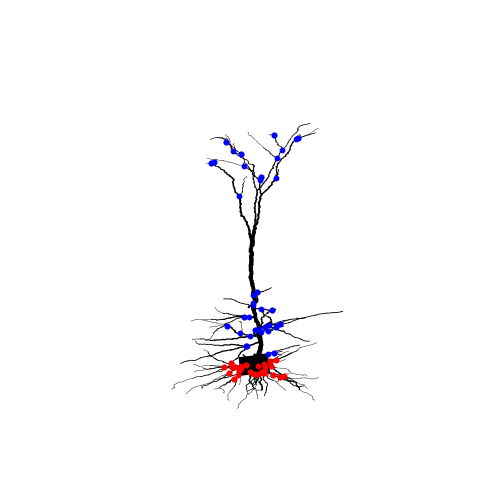

In [15]:
tip_dend = [2, 4, 5, 6, 10, 13, 14, 15, 19, 21,23,24,27,28,31,32,33,35, 37,38,40,41,44,45,49,50,51,54,56, 58, 59, 61, 62, 66,67, 69,70,72, 74, 76,77, 78, 80, 82, 83]
tip_apic = [8, 9, 10, 12, 13, 17, 18, 19, 23, 24, 25, 29, 31, 32, 33, 35, 39, 42, 43, 44, 47, 48, 49, 52, 55, 56, 58, 59, 63, 65, 66, 67, 70, 72, 73, 76, 77, 78, 79, 84, 85, 86, 87, 90, 91, 93, 95, 97, 98, 101, 102, 103, 105, 107, 108]
ratio_tip = (len(tip_dend)+len(tip_apic))/(84+109)
#  plot tips location
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
# L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)
for i in tip_dend:
    sec=L5PC.dend[i]
    ax.scatter([sec.x3d(0)], [sec.y3d(0)],[sec.z3d(0)], 
                   color='red', s=10, marker='o')
for i in tip_apic:
    sec=L5PC.apic[i]
    ax.scatter([sec.x3d(0)], [sec.y3d(0)],[sec.z3d(0)], 
                   color='blue', s=10, marker='o')

# sec=L5PC.apic[67]
# ax.scatter([sec.x3d(0)], [sec.y3d(0)],[sec.z3d(0)], 
#                 color='blue', s=10, marker='o')

# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
# plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/figure/mean_local_cond_syn_location.eps", format='eps', dpi=300)
plt.show()

In [31]:
len_tip = 0.
len_total = 0.
for i in range(84):
    sec = L5PC.dend[i]
    len_total = len_total + sec.L
    if i in tip_dend:
        len_tip = len_tip + sec.L
for i in range(109):
    sec = L5PC.apic[i]
    len_total = len_total + sec.L
    if i in tip_apic:
        len_tip = len_tip + sec.L
lenratio_tip = len_tip/len_total
print(lenratio_tip)

0.6551714353703681
